In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [4]:
#reading in file
df = pd.read_csv('annotations_data.csv')

In [5]:
def count_answers(word_list, column):
#initialising the dictionary with the known answers
    method_dic = {}
    for word in word_list:
        method_dic[word] = 0

    for method in column:
        options = method.split(", ") #this also splits other answers with ,  
        for option in options:
            if option not in method_dic: #checks if it is a different answer
                method_dic['Other'] = method_dic.get('Other')+1
                break #ensures that even if the other answer has a , in it, it is only counted once
            else: 
                method_dic[option] = method_dic.get(option)+1
    return method_dic

In [6]:
word_list = ['SVM', 'Graph analysis', 'Supervised learning', 'Unsupervised learning', 'Transfer learning', 'Neural network', 'Other']


In [7]:
perf_list = ['AUC', 'Specificity', 'Accuracy', 'Recall', 'F1 score', 'Sensitivity', 'Other']


In [17]:
def create_viz(df, word_list, column, plot_option, name, count_option, stacked_option):
    #narrowing down the df to classification labelled accurately and splitting into 2012 and 2021
    df_true = df[df['Is the article accurately labelled as classification?'] == 'Yes']
    df_2012 = df_true[df_true['Which year is the article from?'] == 2012]
    df_2021 = df_true[df_true['Which year is the article from?'] == 2021]
    
    #counting the answers 
    if count_option == 'multiple choice':
        data = {'2012': count_answers(word_list, df_2012.iloc[:, column]),
       '2021': count_answers(word_list, df_2021.iloc[:, column])}
        df = pd.DataFrame.from_dict(data)

    elif count_option == 'y/n':
        data = {'2012': count_yes_no(df_2012, column),
       '2021': count_yes_no(df_2021, column)}
        
        df = pd.DataFrame.from_dict(data)
        row_names = {0:"Yes", 1:"No", 2:"Don't know"}
        df.rename(index= row_names, inplace=True)
    
    
    df.plot(kind = plot_option, title = name, stacked = stacked_option)
    plt.savefig(name , bbox_inches='tight') #needs a little work, the axis labels are cut off
    
    
    return df


,2012,2021
Yes,5,7
No,4,2
Don't know,0,0


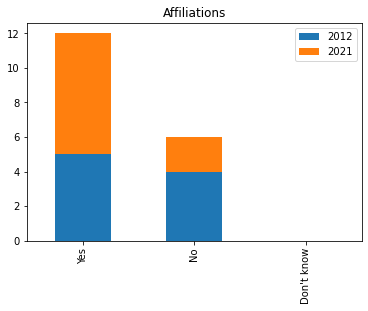

In [27]:
create_viz(df, [], 23, 'bar', 'Affiliations', 'y/n', True)

,2012,2021
SVM,4,0
Graph analysis,2,1
Supervised learning,0,1
Unsupervised learning,1,1
Transfer learning,0,1
Neural network,0,5
Other,6,4


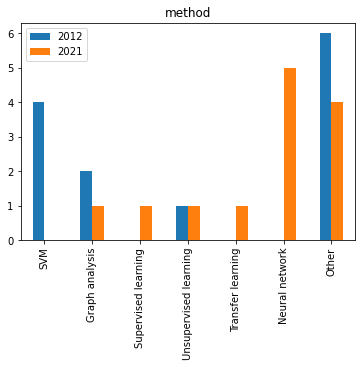

In [26]:
create_viz(df, word_list, 8, 'bar', 'method', 'multiple choice', False)

,2012,2021
AUC,2,4
Specificity,3,2
Accuracy,7,6
Recall,0,0
F1 score,0,3
Sensitivity,4,3
Other,4,4


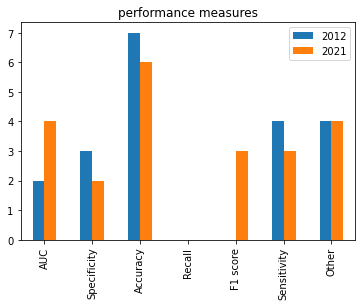

In [25]:
create_viz(df, perf_list, 9,'bar', 'performance measures', 'multiple choice', False)

In [22]:
ethics_columns = [25, 27, 29, 31]

In [10]:
def count_yes_no(df, column):
    #creating a list of number of yes, no and don't know answers for a certain column in a df
    answer_list = [0,0,0] #[yes, no, don't know]
    for input in df[df.columns[column]]:
        if input == 'Yes':
            answer_list[0] += 1
        elif input == 'No':
            answer_list[1] += 1
        else:
            answer_list[2] += 1
    return answer_list

In [19]:
def create_ethics_viz(df, columns, plot_option, name, year):
    #narrowing down the df to classification labelled accurately and splitting into 2012 and 2021
    df_true = df[df['Is the article accurately labelled as classification?'] == 'Yes']
    if year == 2012:
        df = df_true[df_true['Which year is the article from?'] == 2012]
    else:
        df = df_true[df_true['Which year is the article from?'] == 2021]
    
    #creating shorter column names - don't like them particularly..
    column_names = {}
    i = 1
    for column in columns:
        short_title = 'Ethics ' + str(i)
        column_names[column] = short_title
        i += 1 
        
    #counting the answers
    data = {column:[] for column in columns}
    for column in columns:
        data[column] = count_yes_no(df, column)
    df = pd.DataFrame(data) 
    
    #renaming columns and rows
  
    row_names = {0:"Yes", 1:"No", 2:"Don't know"}

    df.rename(index= row_names, columns = column_names, inplace=True)
        

    df.transpose().plot(kind = plot_option, title = name, stacked = True)
    plt.savefig(name, bbox_inches='tight') #needs a little work, the axis labels are cut off
    
    return df
    


,Ethics 1,Ethics 2,Ethics 3,Ethics 4
Yes,0,0,0,1
No,9,9,9,7
Don't know,0,0,0,1


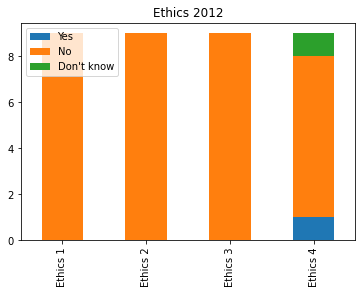

In [23]:
create_ethics_viz(df, ethics_columns, 'bar', 'Ethics 2012', 2012)

,Ethics 1,Ethics 2,Ethics 3,Ethics 4
Yes,0,2,0,8
No,9,7,9,1
Don't know,0,0,0,0


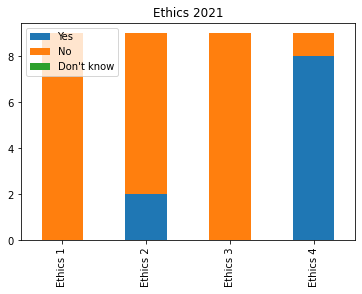

In [24]:
create_ethics_viz(df, ethics_columns, 'bar', 'Ethics 2021', 2021)